Load the data first:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
DATA_FILE = './data/data.csv'

data = pd.read_csv(DATA_FILE)
continuous = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4',
              'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4',
              'Family_Hist_5']
discrete = ['Medical_History_1', 'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']
dummy = [col for col in data.columns if col.startswith('Medical_Keyword')]
categorical = list(set(data.columns) - set(continuous) - set(discrete) - set(dummy) - {'Response', 'Id'})

In [3]:
# data.head()
# data.shape

[print("{} {} \t{}\t{}".format(col.ljust(30), data[col].dtype,data[col].isnull().sum(), 'cont' if col in continuous else '')) for col in data.columns];


Id                             int64 	0	
Product_Info_1                 int64 	0	
Product_Info_2                 object 	0	
Product_Info_3                 int64 	0	
Product_Info_4                 float64 	0	cont
Product_Info_5                 int64 	0	
Product_Info_6                 int64 	0	
Product_Info_7                 int64 	0	
Ins_Age                        float64 	0	cont
Ht                             float64 	0	cont
Wt                             float64 	0	cont
BMI                            float64 	0	cont
Employment_Info_1              float64 	19	cont
Employment_Info_2              int64 	0	
Employment_Info_3              int64 	0	
Employment_Info_4              float64 	6779	cont
Employment_Info_5              int64 	0	
Employment_Info_6              float64 	10854	cont
InsuredInfo_1                  int64 	0	
InsuredInfo_2                  int64 	0	
InsuredInfo_3                  int64 	0	
InsuredInfo_4                  int64 	0	
InsuredInfo_5                  int64 	0	


In [41]:
labels = data['Response']
labels.unique()

array([8, 4, 1, 6, 2, 7, 3, 5])

In [4]:
labels.describe()

count    59381.000000
mean         5.636837
std          2.456833
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          8.000000
Name: Response, dtype: float64

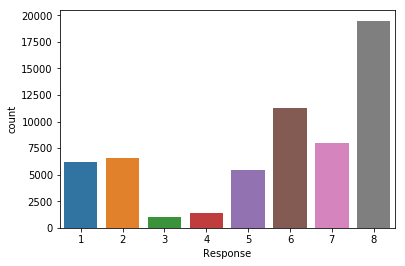

In [42]:
sns.countplot(labels)

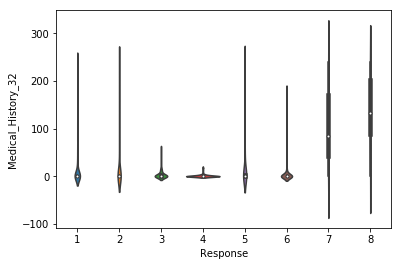

In [61]:
# sns.jointplot(x='Response', y='Wt', data=pd.concat([labels, data['Wt']],axis=1),  kind='hex')
sns.violinplot(x='Response', y='Medical_History_32', data=pd.concat([labels, data['Medical_History_32']],axis=1))


In [3]:
continuous = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4',
              'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4',
              'Family_Hist_5']
discrete = ['Medical_History_1', 'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']
dummy = [col for col in data.columns if col.startswith('Medical_Keyword')]
categorical = list(set(data.columns) - set(continuous) - set(discrete) - set(dummy) - {'Response'})


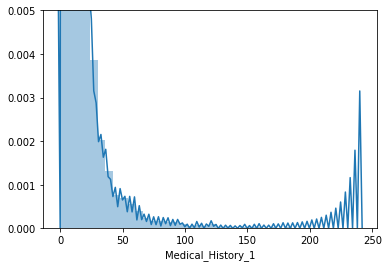

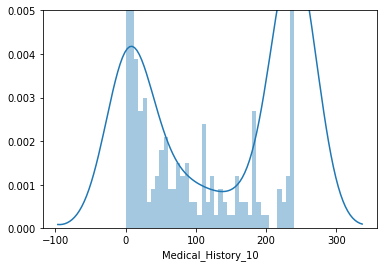

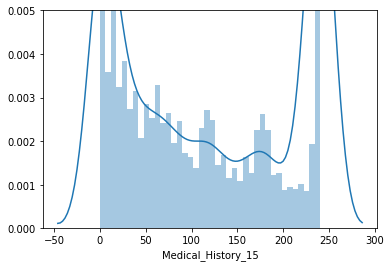

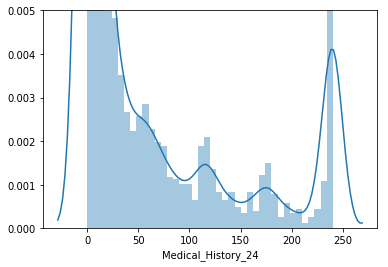

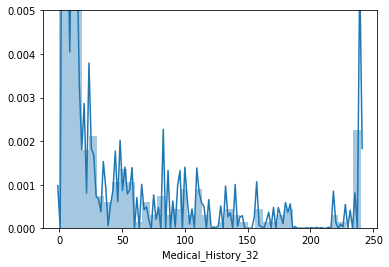

In [135]:
for attr in discrete:
    plt.figure()
    clean = data[attr].dropna()
    ax = sns.distplot(clean, bins=40)
    # ax.set(yscale='log')
    ax.set_ylim(0.00001,0.005)


Most of the values are nan, while the rest are either very small or very big. The significant peak at the end might be caused by clipping the values up to 240, similarly for 0 (the values were normalized, so it is not quite sure what caused it). Maybe try to list the most popular for each:

In [5]:
for attr in discrete:
    print("{}, nan: {}".format(attr, data[attr].isnull().sum()))
    print(dict(data[attr].value_counts().nlargest(20)))

Medical_History_1, nan: 8889
{1.0: 7657, 2.0: 5727, 0.0: 4789, 3.0: 4722, 4.0: 3668, 5.0: 3149, 6.0: 3017, 7.0: 2082, 12.0: 1738, 8.0: 1618, 9.0: 1480, 10.0: 1339, 11.0: 1183, 13.0: 863, 14.0: 715, 15.0: 583, 16.0: 499, 18.0: 452, 17.0: 442, 24.0: 355}
Medical_History_10, nan: 58824
{240.0: 270, 0.0: 75, 1.0: 22, 2.0: 13, 5.0: 10, 8.0: 6, 4.0: 5, 3.0: 5, 111.0: 4, 19.0: 4, 6.0: 4, 13.0: 4, 120.0: 4, 27.0: 3, 183.0: 3, 24.0: 3, 16.0: 3, 10.0: 3, 75.0: 3, 59.0: 3}
Medical_History_15, nan: 44596
{240.0: 4566, 0.0: 2135, 1.0: 237, 2.0: 132, 12.0: 132, 14.0: 122, 15.0: 110, 13.0: 110, 3.0: 109, 16.0: 87, 24.0: 78, 18.0: 76, 6.0: 75, 4.0: 74, 17.0: 72, 60.0: 69, 26.0: 63, 8.0: 62, 28.0: 58, 5.0: 58}
Medical_History_24, nan: 55580
{0.0: 769, 1.0: 408, 240.0: 338, 2.0: 193, 3.0: 163, 4.0: 94, 6.0: 93, 5.0: 88, 12.0: 85, 8.0: 68, 7.0: 59, 9.0: 44, 10.0: 37, 13.0: 33, 11.0: 30, 17.0: 28, 24.0: 26, 16.0: 26, 15.0: 26, 19.0: 25}
Medical_History_32, nan: 58274
{0.0: 744, 1.0: 73, 2.0: 35, 3.0: 23, 

Most are very rare except low values. Lets do some binning here:
Medical_History_1 -> here could be more diverse, more values, less nan values, maybe actuall binning (different step sizes), or even leave like that and handle nan (might be with flag),
maybe try logarithm to fix the skewness
MH_10 -> lots of nan values, try: (nan, 240, 0, other)
MH_15 -> also a lot nan, similar yo MH_10, a bit more in the middle, maybe do some binning there (nan, 240, 0, bins)
MH_24 -> lots of nan, (nan, 0, 240, bins)
MH_32 -> lots of nan, (nan, 0, bins/other)

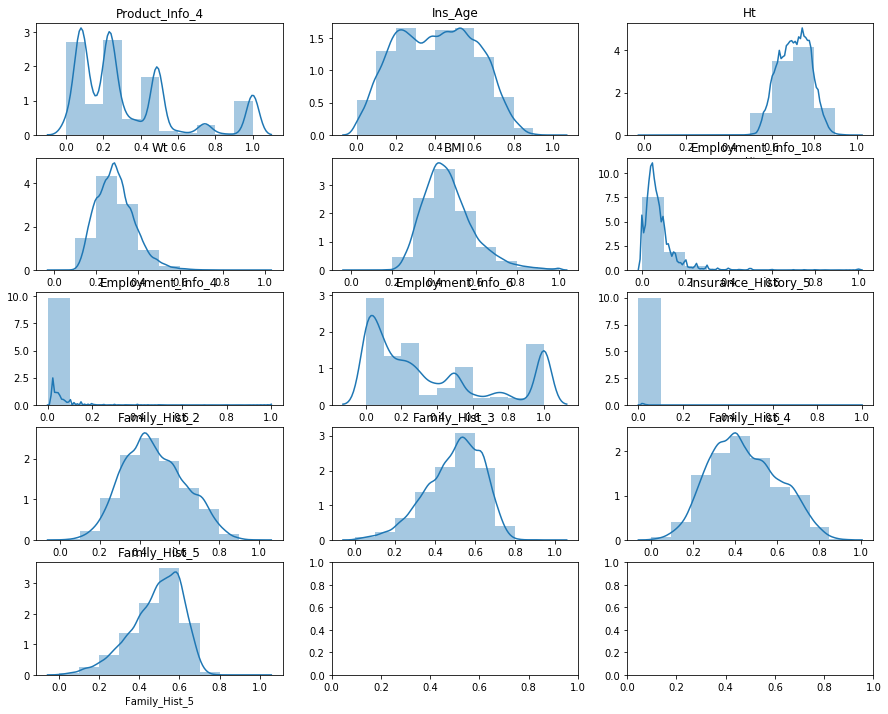

In [19]:
i = 0
fig, axes = plt.subplots(int(math.ceil(len(continuous)/3)), 3, figsize=(15,12))
# plt.figure()
for attr in continuous:
    clean = data[attr].dropna()
    sns.distplot(clean, bins=10, ax=axes[int(i/3)][i%3]).set_title(attr)
    i += 1


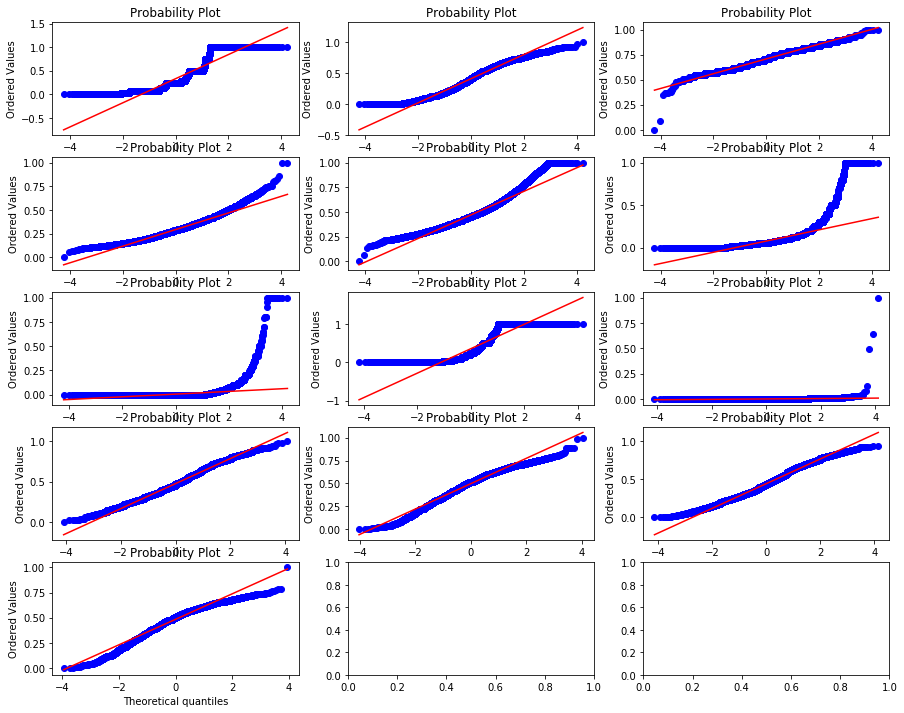

In [41]:
import scipy.stats as stats

i = 0
fig, axes = plt.subplots(int(math.ceil(len(continuous)/3)), 3, figsize=(15,12))
w = 3
for attr in continuous:
    
    clean = data[attr].dropna()
    axes[int(i/3)][i%3].set_title(attr)
    stats.probplot(clean, dist="norm", plot=axes[int(i/3)][i%3])
    i += 1


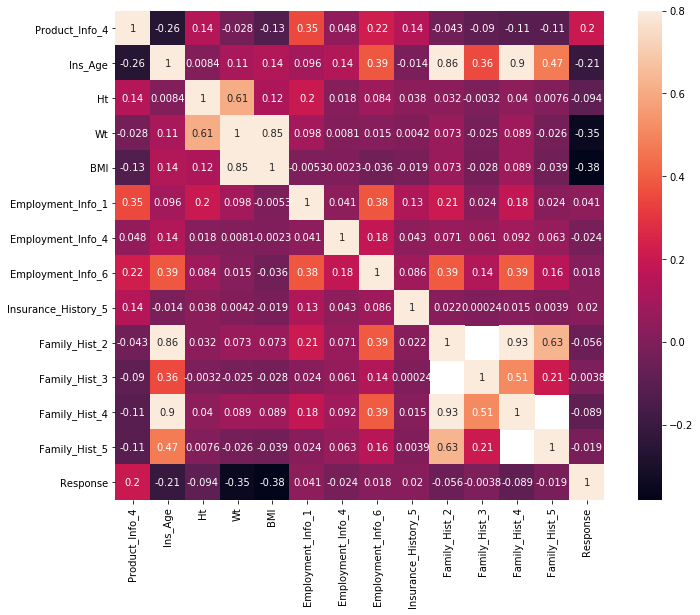

In [42]:
# sns.set()
# sns.pairplot(data[continuous].dropna(), size = 2.5)


corrmat = data[continuous+['Response']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);


No handles with labels found to put in legend.


No handles with labels found to put in legend.


/home/johnny/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/johnny/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


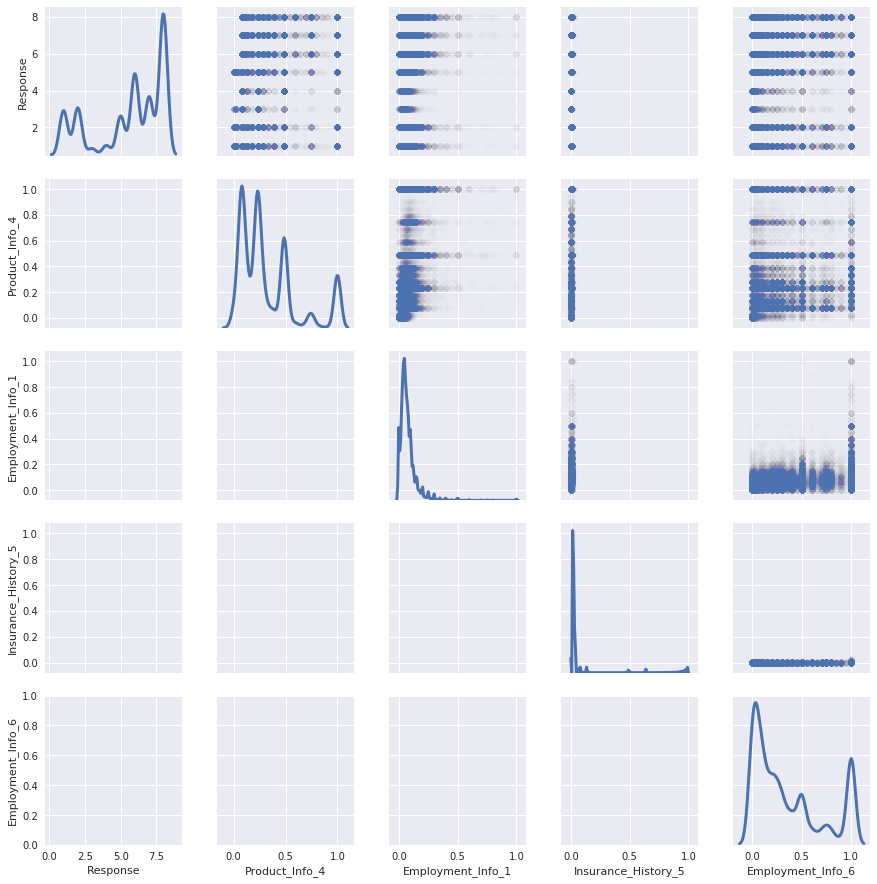

In [167]:

cols = corrmat.nlargest(5, 'Response')['Response'].index

g = sns.PairGrid(data[cols], diag_sharey=False)
# g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot, fit_reg=False, scatter_kws={'alpha':0.002}, marker='o')
g.map_diag(sns.kdeplot, lw=3)
# TODO: improve something here